In [1]:
import pandas as pd
import numpy as np
import seaborn as sns;sns.set_style('white')
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from scipy.cluster.hierarchy import fcluster,dendrogram,linkage
from scipy.spatial.distance import squareform
import itertools
from matplotlib.pyplot import figure
from matplotlib.colors import LogNorm, Normalize
import warnings
from tqdm import tqdm
import random
warnings.simplefilter("ignore")

### Plot for Figure 2C

In [ ]:
df_cluster_quality = pd.read_csv('./rand_score_errorbars.csv',
                                index_col=None)

mod_dict = {'original':'original',
           'length':'only length filtering',
           'only_flanked': 'only flanked',
           'length_flanking': 'length filtering + flanking',
           'uniq_length': 'unique sequences + length filtering',
           'clonal_pat': 'clonal filtering within a patient',
           'clonal_all_df': 'clonal filtering across patients'}

df_cluster_quality['modification'] = df_cluster_quality['modification'].apply(lambda x: mod_dict[x])
embedding_dict = {'ESM2': 'ESM2 — W2',
                 'OHE': 'OHE — W2',
                 'AB2': 'AB2 — W2',
                 'SONIA': 'SONIA — Pearson',
                 'Jaccard': 'Jaccard'}

df_cluster_quality['embedding'] = df_cluster_quality['embedding'].apply(lambda x: embedding_dict[x])

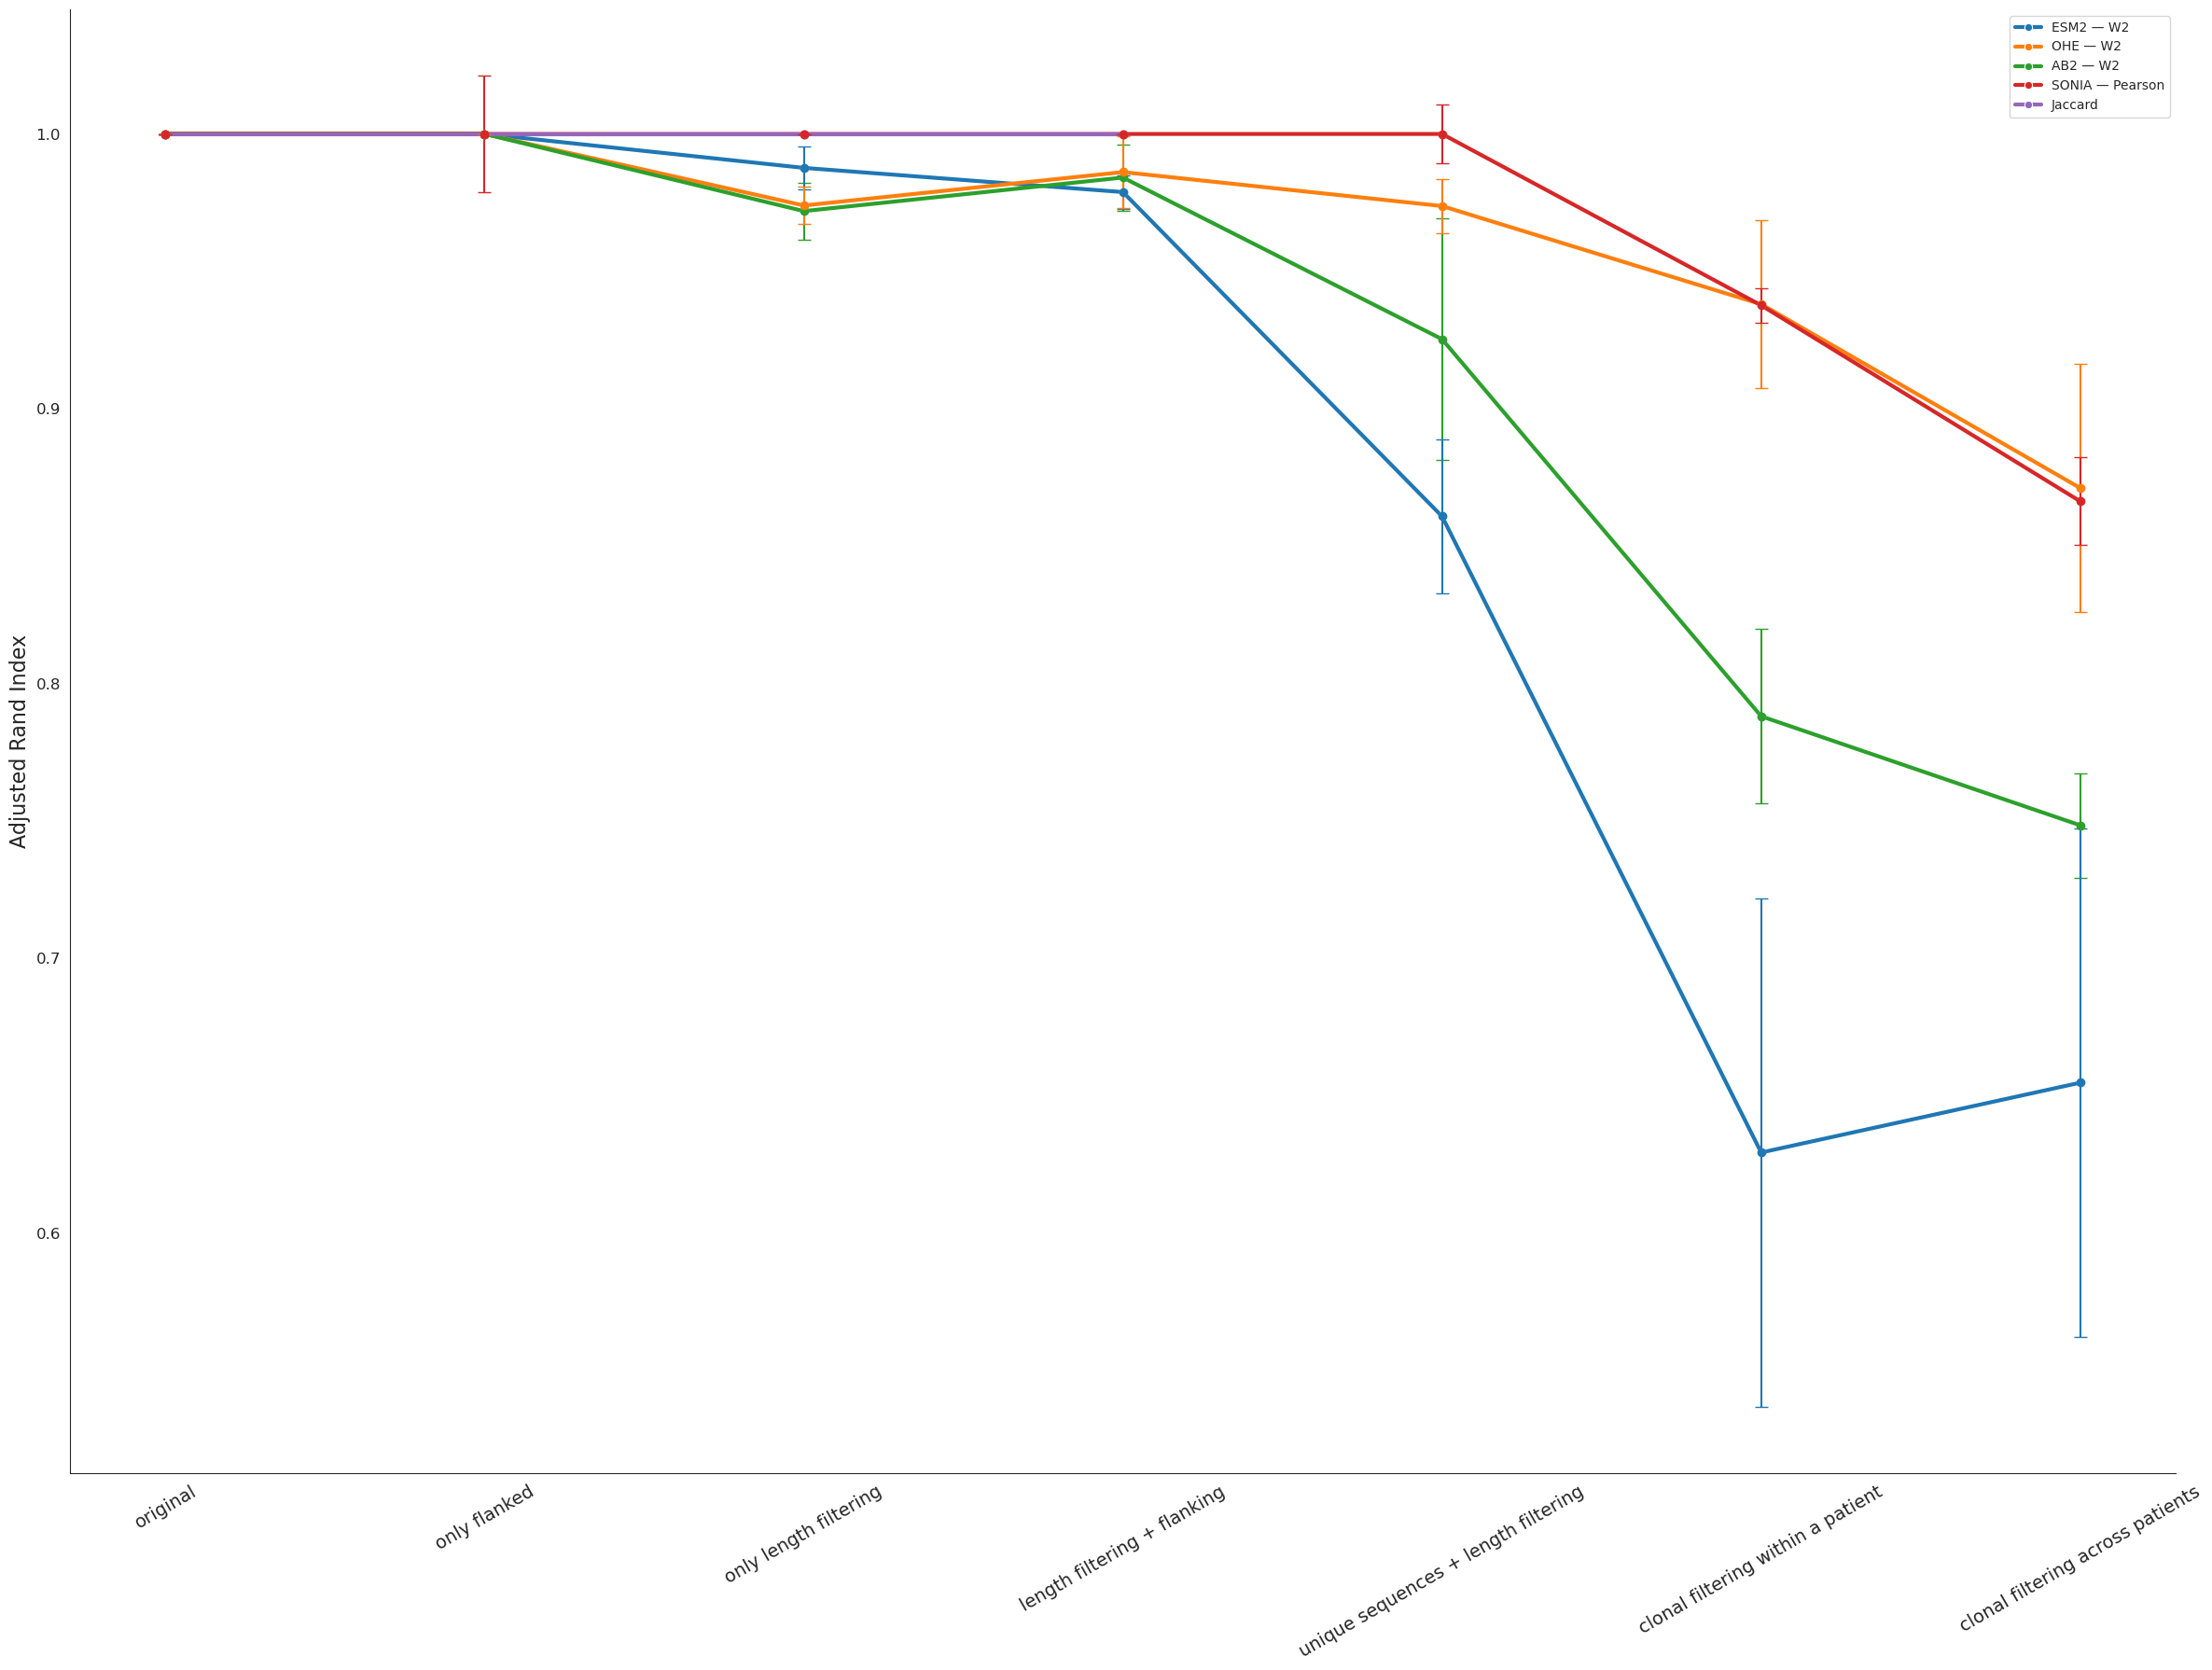

In [ ]:
plt.rcParams["figure.figsize"] = (24,18)


g = sns.lineplot(data=df_cluster_quality, x='modification', y='median', hue='embedding',
             linewidth=3,marker='o')
g.legend_.set_title(None)
colors = [sns.color_palette()[2],
          sns.color_palette()[0],
          sns.color_palette()[4],
          sns.color_palette()[1],          
          sns.color_palette()[3]]


for color, (key, grp) in zip(colors,df_cluster_quality.groupby('embedding')):
    plt.errorbar(grp['modification'], grp['median'], 
                 yerr=[grp['std'],grp['std']], 
                 fmt='o', 
                 color = color,
                 capsize=5, 
                 label=key)
    
# Plot tuning
plt.xlabel('')
plt.ylabel('Adjusted Rand Index',fontsize=16)
#plt.ylim([0,1.1])
plt.xticks(fontsize=14,rotation=30)
plt.yticks(fontsize=12)
sns.despine()
# Plot showing
plt.tight_layout()
#plt.savefig('./Fig_2C.png',
#           dpi=600)